In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Use DT classifier

In [43]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
model = DecisionTreeClassifier(random_state=0) # Vanilla DT
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9090909090909091


In [ ]:
dir(DecisionTreeClassifier)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'cost_complexity_pruning_path',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'n_features_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params']

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
len(cancer.feature_names) # 30 features

30

In [ ]:
print(model.get_depth())
print(model.get_n_leaves())
print(model.get_params()) # default

8
16
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


set parameters

In [ ]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# max depth 제한으로 over fitting 방지 - test accuracy 상승

0.9765258215962441
0.951048951048951


criterion ; gini impurity (default) 대신 entropy (information gain) 사용

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test)) # 결과는 비슷함

0.9812206572769953
0.958041958041958


[Text(201.86470588235295, 195.696, 'X[22] <= 114.45\nentropy = 0.946\nsamples = 426\nvalue = [155, 271]'),
 Text(108.31764705882354, 152.208, 'X[27] <= 0.111\nentropy = 0.471\nsamples = 298\nvalue = [30, 268]'),
 Text(39.38823529411765, 108.72, 'X[13] <= 45.17\nentropy = 0.123\nsamples = 238\nvalue = [4, 234]'),
 Text(19.694117647058825, 65.232, 'entropy = 0.0\nsamples = 229\nvalue = [0, 229]'),
 Text(59.082352941176474, 65.232, 'X[21] <= 22.76\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(39.38823529411765, 21.744, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(78.7764705882353, 21.744, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(177.24705882352941, 108.72, 'X[21] <= 25.825\nentropy = 0.987\nsamples = 60\nvalue = [26, 34]'),
 Text(137.85882352941178, 65.232, 'X[4] <= 0.126\nentropy = 0.242\nsamples = 25\nvalue = [1, 24]'),
 Text(118.16470588235295, 21.744, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(157.5529411764706, 21.744, 'entropy = 0.0\nsample

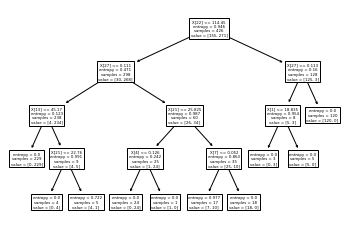

In [ ]:
from sklearn import tree
tree.plot_tree(model)

### Ensemble

### 1) bagging

In [10]:
from sklearn.ensemble import RandomForestClassifier # Use Random Forest # Bagging

In [ ]:
rf = RandomForestClassifier(n_estimators = 50, max_depth=5, max_leaf_nodes=10, n_jobs=-1)
rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9906103286384976
0.972027972027972


In [ ]:
rf = RandomForestClassifier(n_estimators = 50, max_depth=5, max_leaf_nodes=10, n_jobs=-1)
rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

In [ ]:
from sklearn.ensemble import VotingClassifier # Use voting classifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
clf1 = LogisticRegression(solver='lbfgs')
clf2 = RandomForestClassifier()
clf3 = SVC(probability=True)

In [ ]:
voting_c = VotingClassifier(estimators=[('LR', clf1), ('RF', clf2), ('SV', clf3)], voting='soft')

In [ ]:
for clf in (clf1, clf2, clf3, voting_c):
  clf.fit(X_train, y_train)
  print(clf.__class__.__name__, clf.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression 0.951048951048951
RandomForestClassifier 0.972027972027972
SVC 0.916083916083916


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier 0.965034965034965


In [1]:
from sklearn.ensemble import BaggingClassifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), bootstrap=True)
bagging.fit(X_train, y_train)

print(bagging.score(X_test, y_test))

0.9370629370629371


In [6]:
bagging = BaggingClassifier(KNeighborsClassifier(), bootstrap=False)
bagging.fit(X_train, y_train)

print(bagging.score(X_test, y_test))

0.916083916083916


In [8]:
bagging = BaggingClassifier(KNeighborsClassifier(), bootstrap=True, bootstrap_features=True)
bagging.fit(X_train, y_train)

print(bagging.score(X_test, y_test))

0.9300699300699301


In [12]:
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
et_c = ExtraTreesClassifier(n_estimators = 50, max_depth=5, max_leaf_nodes=10, n_jobs=-1)
et_c.fit(X_train, y_train)
print(et_c.score(X_test, y_test))

0.9300699300699301


### 2) boosting

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ab_c = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, learning_rate=0.8) # If None, base estimator is DT
ab_c.fit(X_train, y_train)

print(ab_c.score(X_train, y_train))
print(ab_c.score(X_test, y_test))

1.0
0.8811188811188811


In [59]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
from sklearn.linear_model import LogisticRegression

In [60]:
ab_c = AdaBoostClassifier(LogisticRegression(), n_estimators=100, algorithm='SAMME') # If None, base estimator is DT
ab_c.fit(X_train, y_train)

print(ab_c.score(X_train, y_train))
print(ab_c.score(X_test, y_test))

0.92018779342723
0.951048951048951


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gb_c = GradientBoostingClassifier(n_estimators=100, learning_rate=0.8).fit(X_train, y_train)
print(gb_c.score(X_test, y_test))

0.965034965034965


In [25]:
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
X, y = make_friedman1(n_samples=1200)

In [35]:
X.shape

(1200, 10)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=200)

In [38]:
gd_r = GradientBoostingRegressor(loss='squared_error', n_estimators=100, learning_rate=0.1)

In [39]:
gd_r.fit(X_train, y_train)
print(gd_r.score(X_test, y_test))

0.8830212320053763


In [62]:
import xgboost

In [63]:
xgb_c = xgboost.XGBClassifier()
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
xgb_c.fit(X_train, y_train)
print(xgb_c.score(X_test, y_test))

0.958041958041958


In [64]:
import lightgbm

In [66]:
lgbm_c = lightgbm.LGBMClassifier()
lgbm_c.fit(X_train, y_train)
print(lgbm_c.score(X_test, y_test))

0.972027972027972
